# Linear Regression vs. LASSO

This notebook demonstrate the performances of the ordinal least squares (OLS) linear model and the least absolute shrinkage and selection operator (LASSO) model. Let $\hat{y}$ be the predicted value, we have the following liner asumption.

$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_2
$$

Although both two models assume the linear relation between the input and output, they minimize different loss functions. 

Linear Model minimizes
$$
\sum \big(y-\hat{y} \big)^2.
$$

LASSO minimizes
$$
\sum \bigg(y-\hat{y} \bigg)^2 +  \alpha \bigg( |w_1|+|w_2| \bigg).
$$

### 1. The effect of alpha in LASSO

 - LASSO has hyperparameter $\alpha$.  A large $\alpha$ shrinks the coefficients to zeros quicklier.

 - In the following codes, change the value of $\alpha$ to see the change of the slope of the two models. 

In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


#### Example 1

In [2]:
def lasso_plot(alpha=10, legend=True):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    from sklearn import linear_model
    np.random.seed(0)
    # Create a dataset
    x = 30 * np.random.random((20, 1))
    y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)
    # create a linear regression model
    model = LinearRegression()
    model.fit(x, y)
    # predict y from the data
    x_new = np.linspace(0, 30, 100)
    y_new = model.predict(x_new[:, np.newaxis])
    ######## LASSO
    model1 = linear_model.Lasso(alpha=alpha)
    model1.fit(x, y)
    # predict y from the data
    y_new1 = model1.predict(x_new[:, np.newaxis])
    # plot the results
    plt.figure(figsize=(8, 6))
    ax = plt.axes()
    ax.scatter(x, y)
    ax.plot(x_new, y_new)
    ax.plot(x_new, y_new1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.axis('tight')
    s1 = np.round(model.coef_[0][0], 3)
    s2 = np.round(model1.coef_[0], 3)
    if(legend):
        plt.legend(['Linear Model. Slope =' + str(s1), 'LASSO Model. Slope ='+ str(s2)], loc='upper left')
    plt.savefig('lasso'+str(alpha)+'.png', dpi=300)
    plt.show()
    from tabulate import tabulate
    import pandas as pd
    d = np.concatenate((x,y), axis=1)
    d = pd.DataFrame(d, columns= ['x','y'])
    


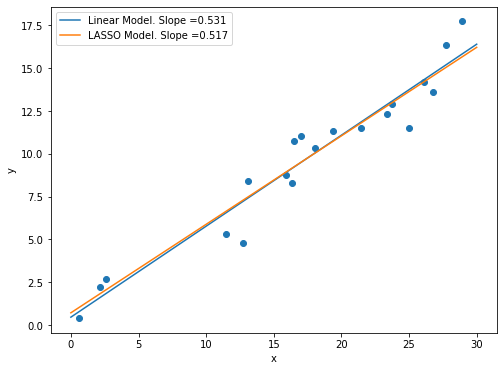

In [3]:
lasso_plot(alpha=1, legend=True)

#### Example 2

In [4]:
def lasso_coef(size=100, coef=[1, 5, 10, 7, 9], alpha=1):
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn import linear_model
    dim = [size, len(coef)]
    np.random.seed(0)
    x = np.random.random(dim)
    y = x.dot(coef) + np.random.normal(0, 1, size)
    # create a linear regression model
    model = LinearRegression()
    model.fit(x, y)
    ######## LASSO
    model1 = linear_model.Lasso(alpha=alpha)
    model1.fit(x, y)
    from tabulate import tabulate
    s1 = model.coef_
    s2 = model1.coef_
    s = np.vstack((coef, s1, s2))
    import pandas as pd
    s = pd.DataFrame(s, index=["Truth",'Linear Model','LASSO'])
    headers = ['w' + str(i) for i in range(1,len(coef)+1)]
    print(tabulate(s, headers=headers, tablefmt="fancy_grid"))

In [5]:
#elastic(alpha=.05, coef=[0, 0, 4, 3, 0, 1, 0, 3, 0 , 6, 0, 0, 0, 5, 1])
lasso_coef(alpha=.04, coef=[0, 4, 0, 3, 0, 7])

╒══════════════╤═══════════╤═════════╤══════════╤═════════╤═══════════╤═════════╕
│              │        w1 │      w2 │       w3 │      w4 │        w5 │      w6 │
╞══════════════╪═══════════╪═════════╪══════════╪═════════╪═══════════╪═════════╡
│ Truth        │  0        │ 4       │ 0        │ 3       │ 0         │ 7       │
├──────────────┼───────────┼─────────┼──────────┼─────────┼───────────┼─────────┤
│ Linear Model │ -0.244061 │ 3.54013 │ 0.221939 │ 2.6042  │ 0.0982158 │ 6.83617 │
├──────────────┼───────────┼─────────┼──────────┼─────────┼───────────┼─────────┤
│ LASSO        │ -0        │ 3.18154 │ 0        │ 2.33082 │ 0         │ 6.39825 │
╘══════════════╧═══════════╧═════════╧══════════╧═════════╧═══════════╧═════════╛


### 2. Predicting Boston Housing Price

We predict housing prices in Boston using the linear model and LASSO. We will add some noise to the data to see how the noise affects linear model and LASSO.

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

from sklearn import linear_model

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
#print boston_df.head(3)
newX=boston_df.drop('Price',axis=1)
newY=boston_df['Price']
#print type(newY)# pandas core frame
x_train,x_test,y_train,y_test=train_test_split(newX,newY,test_size=0.9,random_state=27)

### Data Description

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Linear Model

**On Original Data**

In [8]:
newX=boston_df.drop('Price',axis=1)
newY=boston_df['Price']

#print type(newY)# pandas core frame
x_train,x_test,y_train,y_test=train_test_split(newX,newY,test_size=0.9,random_state=27)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

coef1 = pd.DataFrame({'Variable':x_train.columns, 
                     'Coef':model.coef_,
                      'Model': 'Linear',
                      'Data': 'Original'
                    })

lm_org = r2_score(y_test, model.predict(x_test))

print('R2 of Linear Model:',lm_org)

R2 of Linear Model: 0.16682125146939897


In [9]:
model = linear_model.Lasso(alpha=1.216)
model.fit(x_train, y_train)

coef2 = pd.DataFrame({'Variable':x_train.columns, 
                     'Coef':model.coef_,
                      'Model':'LASSO',
                      'Data': 'Original'
                    })

lasso_org = r2_score(y_test, model.predict(x_test))

print('R2 of LASSO:', lasso_org)

R2 of LASSO: 0.6428736650944249


In [10]:
coef = pd.concat([coef1, coef2], ignore_index=True, axis=1)
coef = coef.drop([2, 3, 4, 6, 7], axis=1)
coef.columns = ['Variable','Linear Model', 'LASSO']
coef

,Variable,Linear Model,LASSO
0,CRIM,0.651033,0.000005
1,ZN,0.060976,0.075309
2,INDUS,-0.077244,-0.000000
3,CHAS,12.473065,0.000000
4,NOX,-11.575379,-0.000000
5,RM,8.523281,3.202072
6,AGE,-0.054629,0.011858
7,DIS,-1.720972,-0.627615
8,RAD,-0.239981,0.262110
9,TAX,0.003134,-0.008747


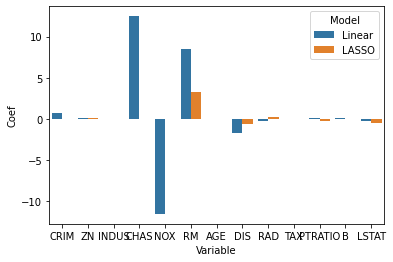

In [11]:
coef = pd.concat([coef1, coef2], ignore_index=True)
coef

import seaborn as sns
ax = sns.barplot(x="Variable", y="Coef", hue = 'Model', data=coef)

**On Noised Data**

We added noise to the data then rerun linear model and lasso to see how the noise affects these two models.

In [12]:
newX=boston_df.drop('Price',axis=1)
newY=boston_df['Price']

newX = pd.concat([newX, pd.DataFrame(np.random.random([newX.shape[0], 20000]), index=newX.index)], axis=1)
#print type(newY)# pandas core frame
x_train,x_test,y_train,y_test=train_test_split(newX,newY,test_size=0.9,random_state=27)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

coef3 = pd.DataFrame({'Variable':x_train.columns, 
                     'Coef':model.coef_,
                      'Model': 'Linear',
                      'Data': 'Noised'
                    })


lm_noised = r2_score(y_test, model.predict(x_test))

print('R2 of Linear Model:',lm_noised)

from sklearn.linear_model import ElasticNet
model = linear_model.Lasso(alpha=1.216)
model.fit(x_train, y_train)

coef4 = pd.DataFrame({'Variable':x_train.columns, 
                     'Coef':model.coef_,
                      'Model':'LASSO',
                      'Data': 'Noised'
                    })

lasso_noised = r2_score(y_test, model.predict(x_test))

print('R2 of LASSO:', lasso_noised)

R2 of Linear Model: 0.4758530983116821
R2 of LASSO: 0.6428736650944249


In [13]:
r = pd.DataFrame({'Model':['Linear', 'LASSO'],
                  'Original Data':[lm_org, lasso_org],
                  'Noised Data':[lm_noised, lasso_noised]
                 })
r

,Model,Original Data,Noised Data
0,Linear,0.166821,0.475853
1,LASSO,0.642874,0.642874


### 3. Titanic Data

We want to predict the ages of passengers on the titanic data. 

In [14]:
import pandas as pd
import numpy as np
np.random.seed(12356)
df = pd.read_csv('titanic.csv')

df = df[df['Age'].notna()]

# Assign input variables
X = df.loc[:,['Pclass','Sex','Fare','Embarked','SibSp','Parch','Survived']]

# Assign target variable
y = df['Age']

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")
# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)
X['Survived'] = X['Survived'].astype(object)
# Encode categorical variable
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r1.fit(x_train, y_train)

# Rsquared
from sklearn.metrics import r2_score
print('Rsquared on Testing: ', r2_score(y_test, r1.predict(x_test)))

Rsquared on Testing:  0.23604182193276024


In [15]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=.01)
model.fit(x_train, y_train)
print(r2_score(y_test, model.predict(x_test)))

0.2353979123677924


### 4.  Practice

A. Download an NBA dataset at this [link](nba_salary2.csv). Use the salary variable as the target. Don't use the following variables as input: 'Player','Salary','NBA_DraftNumber','NBA_Country','Tm'

 - Split the data 80:20 for training and testing
 - Calculate the testing Rsquared of linear model and show the coefficients of the models
 - Calculate the testing Rsquared of LASSO model with alpha =  1.  Show the coefficients of the LASSO.  Do you observe any variables no longer has effect in the LASSO model?
 - Change the value of alpha in the LASSO and observe the Rsquared of LASSO.  Give your comments. 
 - Plot the coefficients of linear model and LASSO. 


B. Redo part A on a different dataset. 

In [47]:
df = pd.read_csv('nba_salary2.csv')
df = df.dropna()
newY=df['Salary']
newX=df.drop(['Player','Salary','NBA_DraftNumber','NBA_Country','Tm'] ,axis=1)
#print type(newY)# pandas core frame
x_train,x_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=9)

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)
print('Rsquared of Linear Model:', r2_score(y_test, model.predict(x_test)))

coef1 = pd.DataFrame({'Variable':x_train.columns, 
                     'Coef':model.coef_,
                      'Model':'Linear',
                      'Data': 'Original'
                    })

Rsquared of Linear Model: 0.3402479146014742


In [48]:
import warnings
warnings.filterwarnings('ignore')

model = linear_model.Lasso(alpha=.01)
model.fit(x_train, y_train)
print('Rsquared of LASSO:', r2_score(y_test, model.predict(x_test)))

coef2 = pd.DataFrame({'Variable':x_train.columns, 
                     'Coef':model.coef_,
                      'Model':'LASSO',
                      'Data': 'Original'
                    })

Rsquared of LASSO: 0.38461872074877324


In [49]:
coef = pd.concat([coef1, coef2], ignore_index=True, axis=1)
coef = coef.drop([2, 3, 4, 6, 7], axis=1)
coef.columns = ['Variable','Linear Model', 'LASSO']
np.round(coef)

,Variable,Linear Model,LASSO
0,Age,1.0,1.0
1,G,-0.0,-0.0
2,MP,0.0,0.0
3,PER,-0.0,-0.0
4,TS%,-5.0,-0.0
5,3PAr,-6.0,-4.0
6,FTr,-0.0,-0.0
7,ORB%,-2.0,-1.0
8,DRB%,-2.0,-1.0
9,TRB%,4.0,2.0


In [50]:
df

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,0.815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3.477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12.307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3.202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3.057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Al Horford,27.734405,Dominican Rep...,3,31,BOS,70,2219,17.5,0.577,...,14.3,18.4,3.8,3.8,7.6,0.164,1.1,3.0,4.1,3.4
481,Abdel Nader,1.167333,Egypt,58,24,BOS,44,463,5.7,0.464,...,17.1,16.9,-0.6,0.7,0.0,0.004,-5.3,0.3,-5.0,-0.3
482,Aaron Harrison,0.083129,USA,62,23,DAL,7,164,6.6,0.411,...,3.9,14.4,-0.1,0.2,0.1,0.019,-3.2,0.3,-2.9,0.0
483,Aaron Gordon,5.504420,USA,4,22,ORL,55,1838,16.6,0.531,...,9.7,24.5,1.1,1.9,3.0,0.078,0.1,-0.1,0.1,1.0
